In [53]:
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

import gudhi

# Read data from the file

Read points from the file and transforming them to a list.

In [54]:
with Path("unknown_object2.out").open("rt") as handle:
    data = handle.readlines()
    
data = [line.strip().split(',') for line in data]
points = [[float(e) for e in line] for line in data]
len(points)


200

In [56]:
max_distance = 0
for p1 in points:
    for p2 in points:
        if p1 != p2:
            distance = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
            max_distance = max(distance, max_distance)

max_distance

1.4116596722248955

# Construct a topological object from cloud of points
VR-Complex.

In [57]:
rips_complex = gudhi.RipsComplex(points=points, max_edge_length= max_distance/2)
# Construct a simplicial complex: already a filtration depending on the parameter d.
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)

Rips complex is of dimension 2 - 715480 simplices - 200 vertices.


# Persistence

Compute the persistent homology.

In [58]:
barcodes = simplex_tree.persistence()
for barcode in barcodes[:10]:
    print(barcode)

(1, (0.019332044218160975, 0.019823696993466047))
(1, (0.009157288261579877, 0.0093373118140939))
(1, (0.008841628952575151, 0.009009855730783691))
(0, (0.0, inf))
(0, (0.0, 0.03271116827660468))
(0, (0.0, 0.03242444838656956))
(0, (0.0, 0.031736404361509936))
(0, (0.0, 0.030753944133077773))
(0, (0.0, 0.03074958469927643))
(0, (0.0, 0.030672076331238435))


# Only in a dimension 0

Compute barcodes only in dimension 0.

In [59]:
simplex_tree.persistence_intervals_in_dimension(0)[:5]

array([[0.        , 0.0004153 ],
       [0.        , 0.00104427],
       [0.        , 0.00105549],
       [0.        , 0.00106413],
       [0.        , 0.00111052]])

# Draw persistence diagram with Gudhi

$0$-dimensional features are the red points (holes of dimension $0$, namely connected components)

The $1$-dimensional features are represented in blue.

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

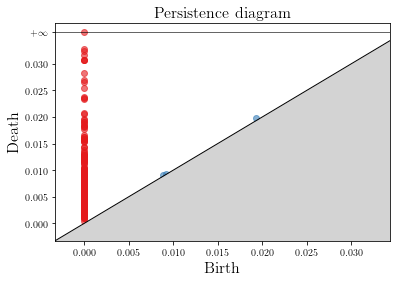

In [60]:
gudhi.plot_persistence_diagram(barcodes)

IndexError: list index out of range

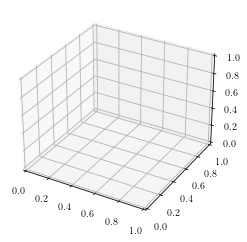

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = [p[0] for p in points]
ydata = [p[1] for p in points]
zdata = [p[2] for p in points]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [36]:
len(points)

100